<a href="https://colab.research.google.com/github/viviennejuma/Regression-Techniques/blob/main/Regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Define the Question?
 
 
 >You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

# b) Defining the Metric for Success
> This project will be successful when:

* We Identify the most crucial independent variables that affect house prices.

* The Regression model achieves atleast 80% accuracy

* Have the lowest RMSE score possible

# c) Understanding the context
> HassConsult offers investment-grade developments all over the City. The developments have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.


# d)Experimental Design
> The project was undertaken using the following design Datasets(Independent Project Week 7 - house_data.csv)

* Performing EDA

* Feature Engineering

* Multiple Linear Regression

* Quantile regression

* Ridge Regression

* Lasso Regression

* Elastic-Net Regression

* Computing the RMSE

* Plotting residual plots

* Assess their heteroscedasticity using Barlette's test


* Challenging the solution

* Conclusion

# e) Data Relevance
> The relavance of our data will be answered by the following questions.

> How accurate is the data at predicting the Price of a house?

> Was the dataset sufficient?

> Was the data biased?

> Is the data source a reliable source?

## Reading the data

In [ ]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Previewing the data

house = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# checking the shape
house.shape

(21613, 20)

In [ ]:
# checking info and data types
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# checking the missing values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# checking the duplicates in our data
house.duplicated().sum()

3

In [ ]:
# dropping the duplicates
house.drop_duplicates(inplace=True)

In [ ]:
# Describing data
house.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21610.0,4.580161e+09,2.876547e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21610.0,5.401789e+05,3.673876e+05,7.500000e+04,3.216125e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21610.0,3.370847e+00,9.301097e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21610.0,2.114739e+00,7.702037e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21610.0,2.079881e+03,9.185003e+02,2.900000e+02,1.425500e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21610.0,1.510829e+04,4.142323e+04,5.200000e+02,5.040000e+03,7.619000e+03,1.068875e+04,1.651359e+06
floors,21610.0,1.494239e+00,5.399935e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21610.0,7.542804e-03,8.652316e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21610.0,2.341971e-01,7.661365e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21610.0,3.409440e+00,6.507639e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# dropping unnecessary columns
house.drop(['id'], axis=1, inplace=True)

In [ ]:
# The categorical and continuous columns
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
continous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


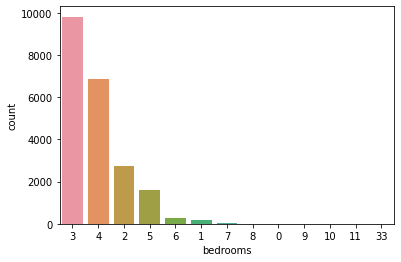

In [ ]:
# bedroom columns
sns.countplot(house.bedrooms,order=house['bedrooms'].value_counts().index)
plt.show()

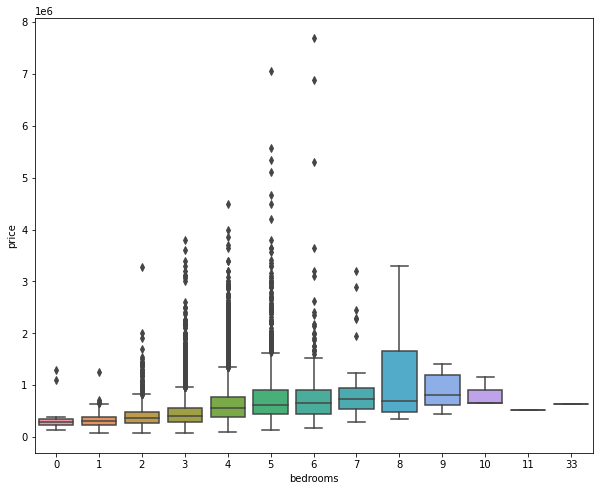

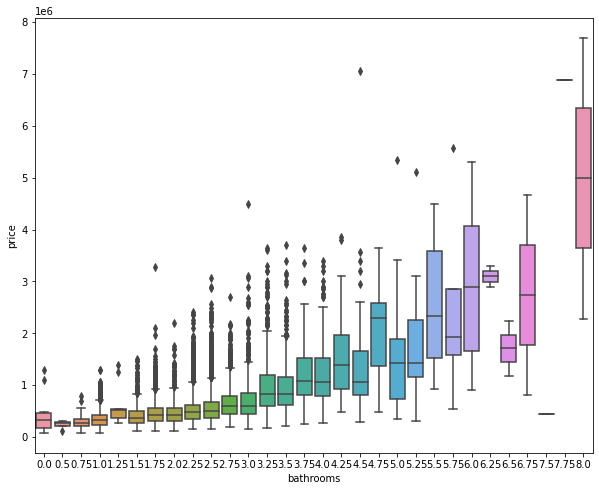

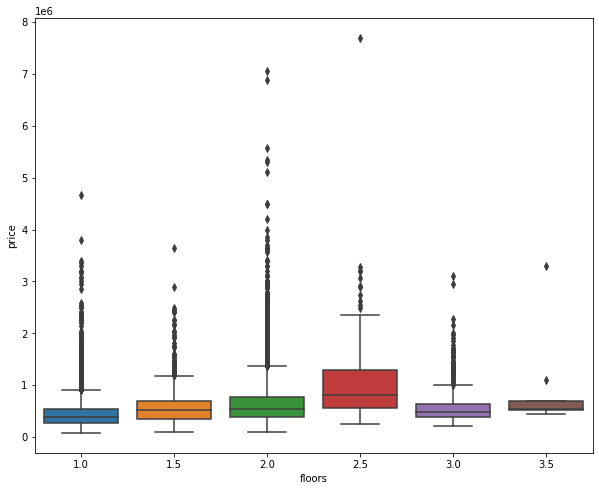

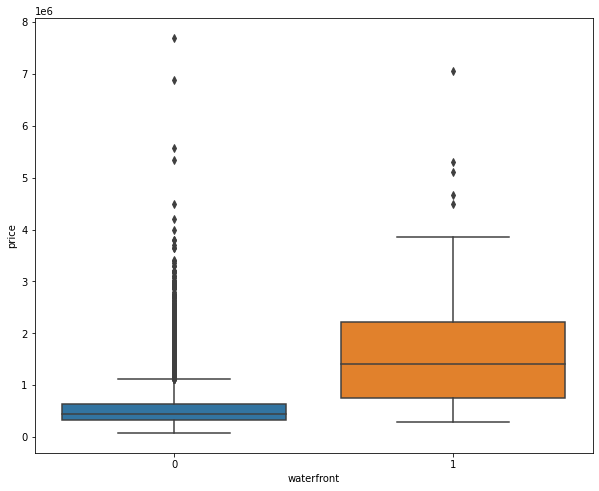

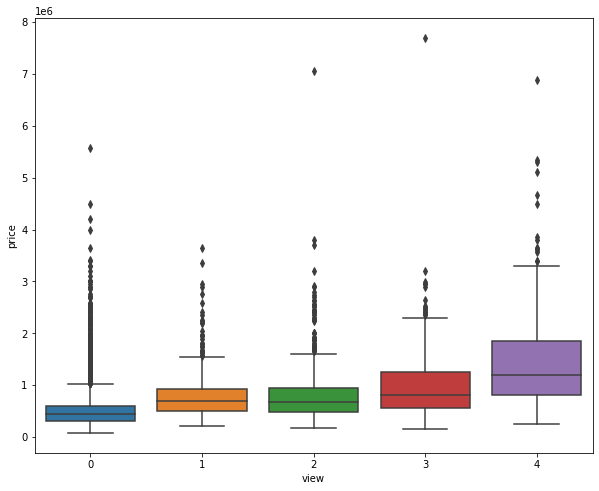

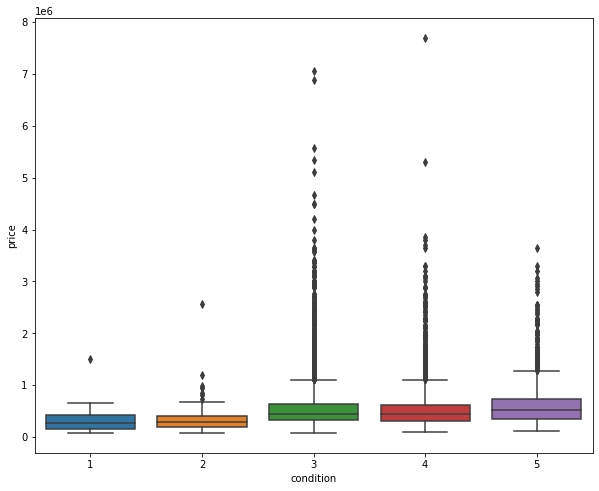

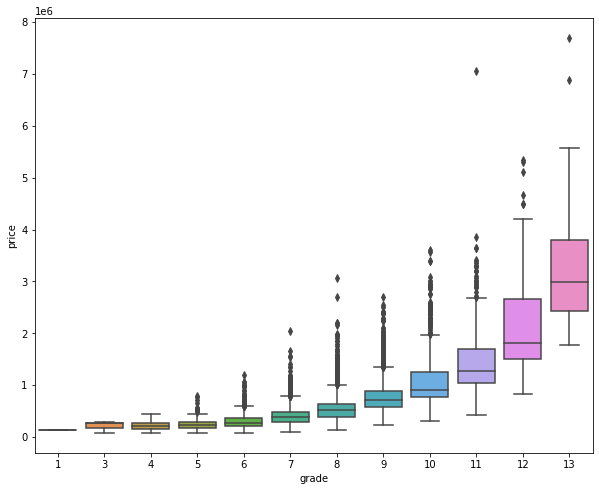

In [ ]:
# Categorical
for column_name in categorical:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=column_name, y='price', data=house)

In [ ]:
house.bedrooms.value_counts()

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## Dealing with Outliers
> Outliers should be kept if they have the potential to reveal useful information about relationships in our data. 
>There are two variables in this dataset, however, whose outliers should be removed: bedrooms and bathrooms. 
If a residence in the dataset has, for example, more than 5 bathrooms or more than 10 bedrooms, we're likely not dealing with single-family homes, but much larger units that would be better to analyze separately. 
For this reason, we'll remove all rows in the data that contain outlier values for these columns.

In [ ]:
count = 0
bath_outliers = []
mean = np.mean(house['bathrooms'])
max_distance = np.std(house['bathrooms']) * 3 

for idx, row in house['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        house.drop(idx, inplace=True)
count

187

In [ ]:
count = 0
bed_outliers = []
mean = np.mean(house['bedrooms'])
max_distance = np.std(house['bedrooms']) * 3 

for idx, row in house['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        house.drop(idx,inplace=True)
count

60

# EDA

## Univariate


In [ ]:
#Bathrooms
print(house.bathrooms.nunique())
print('*'*50)
#there are 30 unique values
house.bathrooms.describe()

17
**************************************************


count    21363.000000
mean         2.088997
std          0.722873
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          4.250000
Name: bathrooms, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


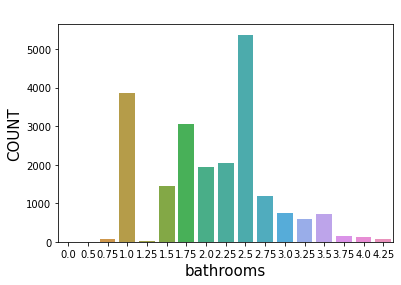

In [ ]:
#visualizing the distribution of bathrooms in the dataset
sns.countplot('bathrooms',data = house)
plt.xlabel("bathrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Bathrooms",fontsize=16,color="white")
plt.show()


##View column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


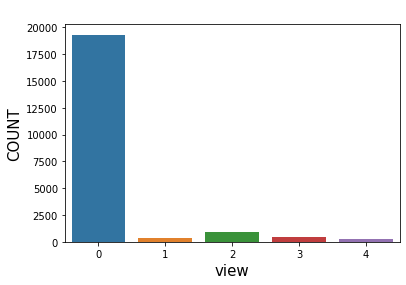

In [ ]:
#There are 5 unique values for the view column
house.view.unique()
sns.countplot('view',data = house)
plt.xlabel("view",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of VIEW",fontsize=16,color="white")
plt.show()

## Waterfront column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


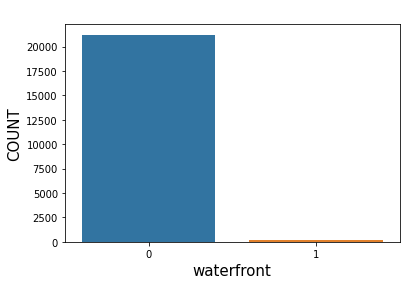

In [ ]:
sns.countplot('waterfront',data = house)
plt.xlabel("waterfront",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of WaterFront",fontsize=16,color="white")
plt.show()

##Condition column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


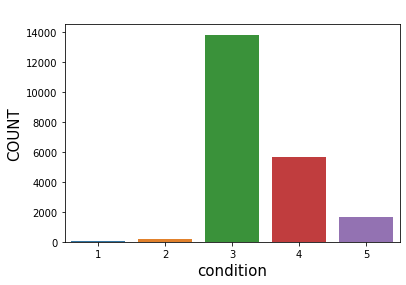

In [ ]:
#visualizing the distribution of the condition of houses
sns.countplot('condition',data = house)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Condition",fontsize=16,color="white")
plt.show()


##Grade column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


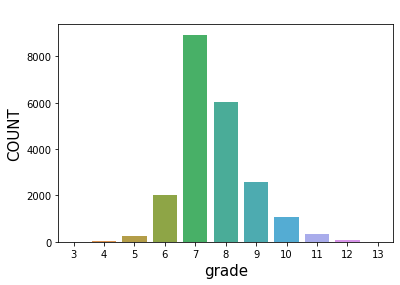

In [ ]:
#visualizing the distribution of the condition of houses
sns.countplot('grade',data = house)
plt.xlabel("grade",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Grade",fontsize=16,color="white")
plt.show()
#The Grade with the highest count is 7 followed by 8.

##Distribution plots

(array([10321.,  9354.,  1533.,   137.,    18.]),
 array([ 370., 1866., 3362., 4858., 6354., 7850.]),
 <a list of 5 Patch objects>)

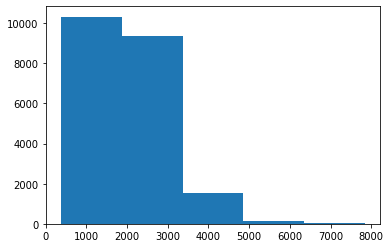

In [ ]:
plt.hist('sqft_living',data=house,bins=5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


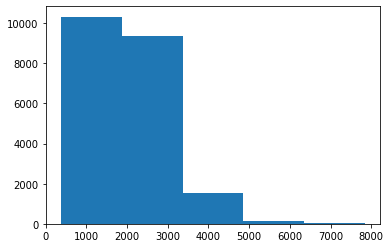

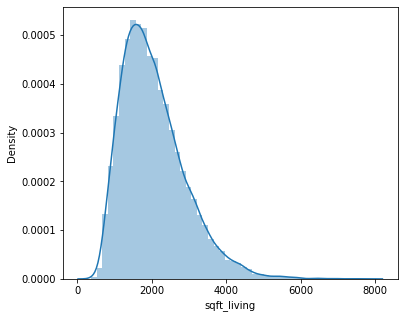

In [ ]:
plt.hist('sqft_living',data=house,bins=5)
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,5))
sns.distplot(house['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

##Bivariate

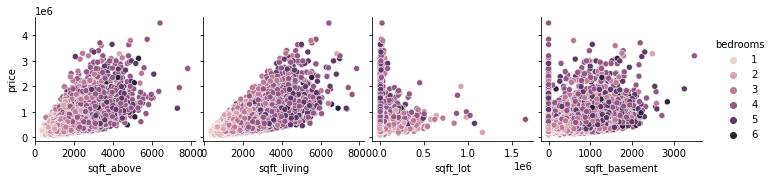

In [ ]:
#Visualizing the data
sns.pairplot(house, 
             x_vars=["sqft_above", "sqft_living", "sqft_lot", "sqft_basement"], 
             y_vars=["price"],
             hue = "bedrooms"
             )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

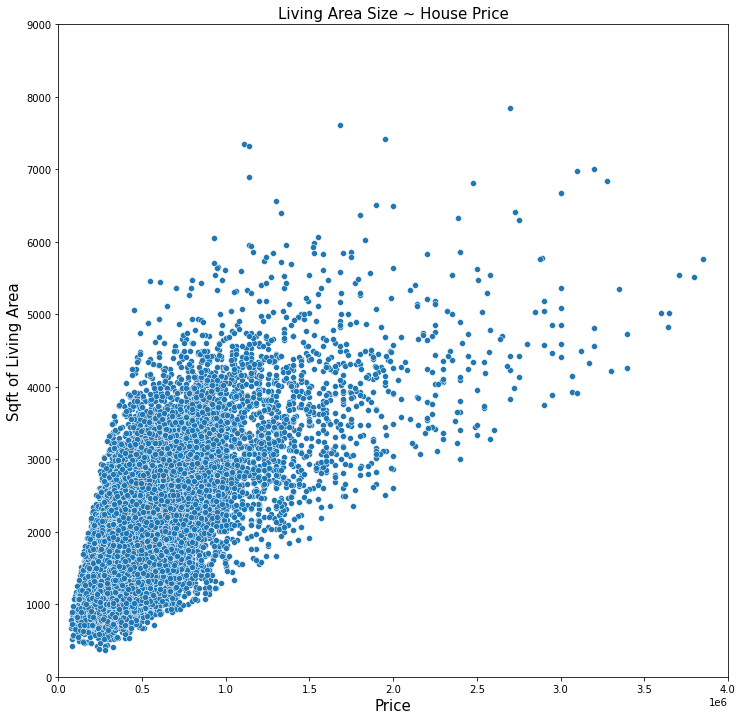

In [ ]:

plt.figure(figsize=(12,12))
sns.scatterplot(house.price, house.sqft_living)
plt.xlim(0,4000000)
plt.ylim(0,9000)
plt.title('Living Area Size ~ House Price', size=15)
plt.ylabel('Sqft of Living Area', size=15)
plt.xlabel('Price', size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


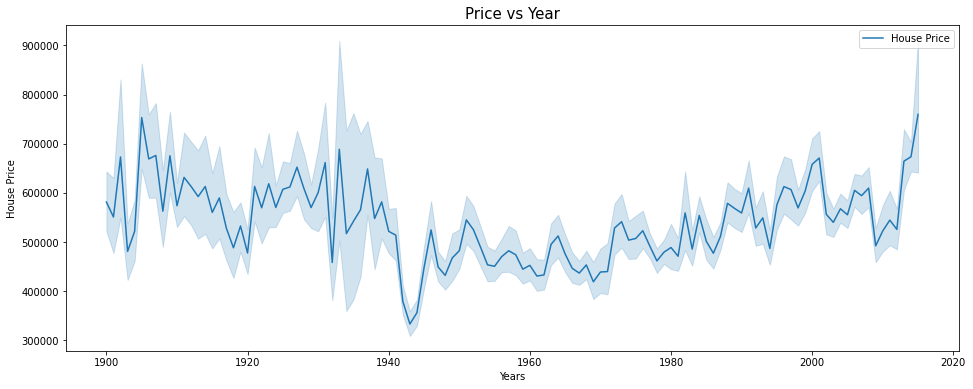

(<matplotlib.legend.Legend at 0x7faec085e310>, None)

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Price vs Year', fontdict={'fontsize': 15}), plt.xlabel('Years'), plt.ylabel('House Price')
sns.lineplot(house.yr_built, house.price, label='House Price')
plt.legend(), plt.show()

##Line plot

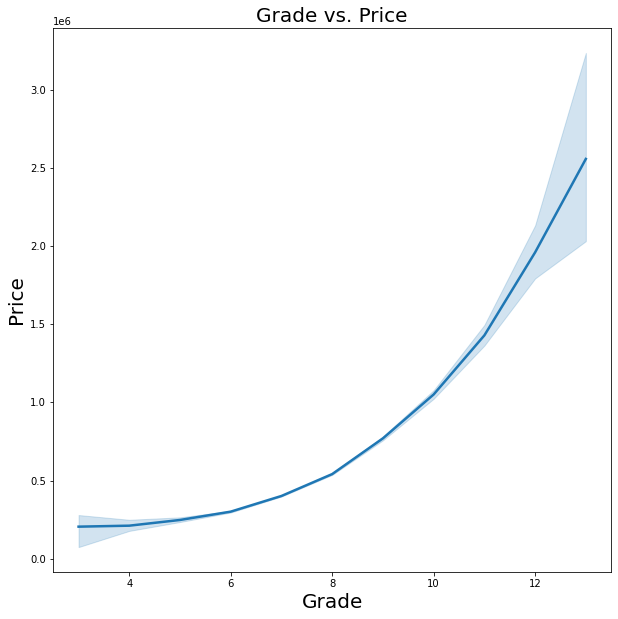

In [ ]:
# Use a line plot to display grade and price
plt.figure(figsize=(10,10))
sns.lineplot(x = "grade", y = "price", data=house, linewidth=2.5)
plt.title('Grade vs. Price', fontsize=20)
plt.xlabel('Grade', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.show()

The above line plot confirms the predictions that if a house if graded highly, it's price will become more valuable. Using grade in this instance will be a great feature to add into the model in the next phase. Within the exploration completed here, it's noteworthy to identify that newer houses result in a higher grade, which created a feedback loop driving the value of the house upwards.


# Checking Correlations and Multicollinearity
We're interested in finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. One of the assumptions of a multiple linear regression model, however, is that there is no multicollinearity among the explanatory variables (i.e., they can't be predicted by other explanatory variables with high accuracy). Below, we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

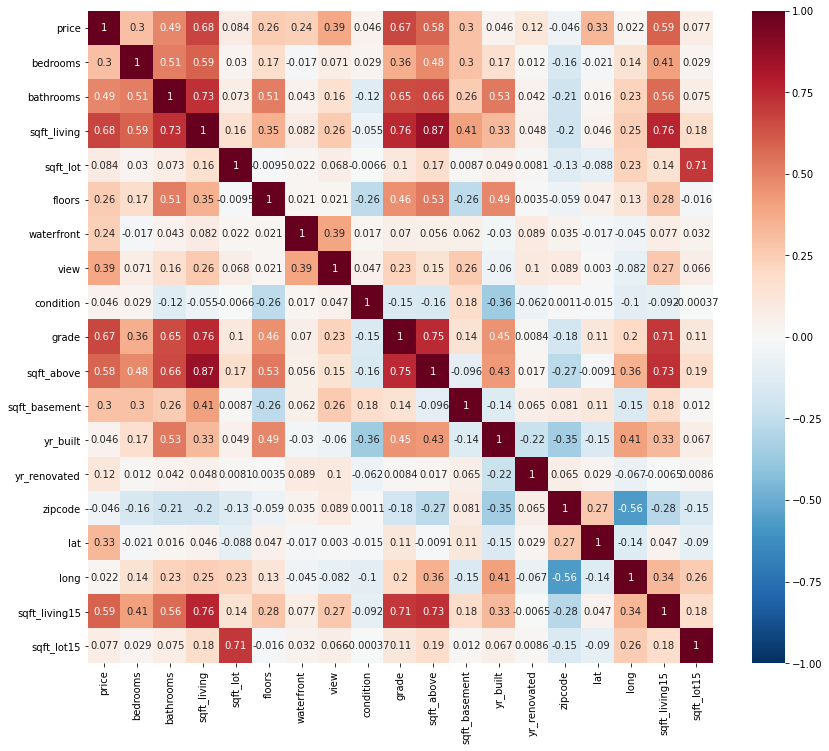

In [ ]:
# Plot a heatmap that identifies correlations of predictors
corr = house.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

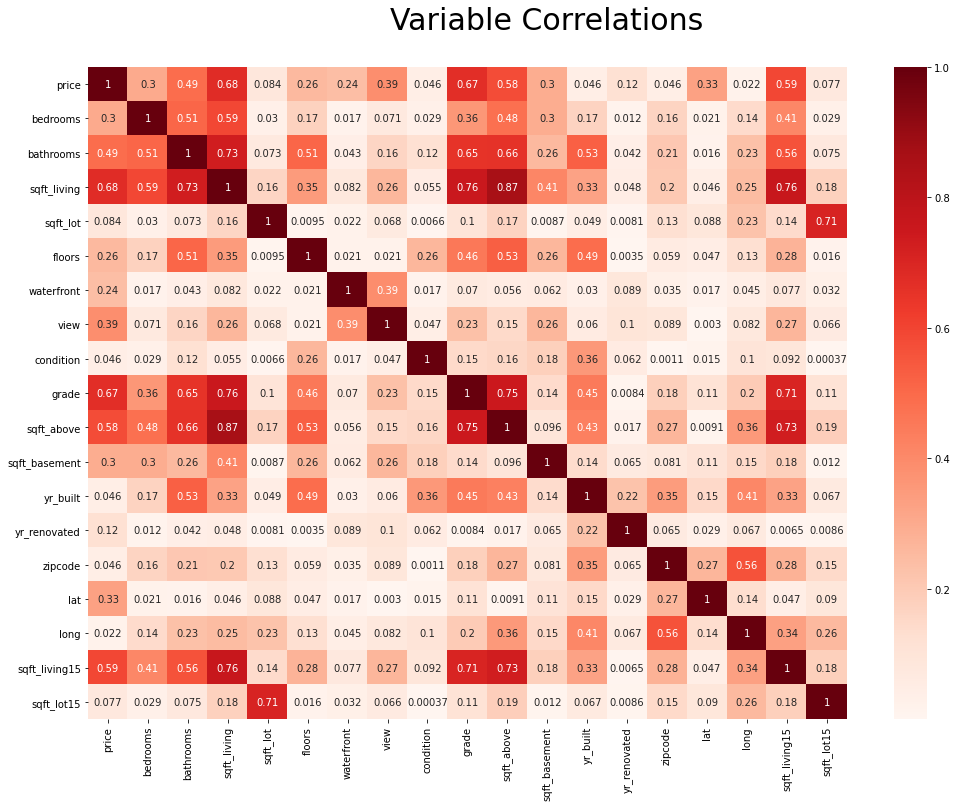

In [ ]:
corr = house.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

In [ ]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [ ]:

Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [ ]:
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
2,0.677607,sqft_living
4,0.668201,grade
7,0.593727,sqft_living15
5,0.578401,sqft_above
1,0.489135,bathrooms
3,0.388040,view
6,0.330978,lat
0,0.302229,bedrooms


Multicollinear Features


,Correlations,Features
0,0.86693,"[sqft_living, sqft_above]"
1,0.86693,"[sqft_above, sqft_living]"


# Standardising the data to mitigate skewness and kurtosis

In [ ]:
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(house['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.37780761]
 [-1.36870518]
 [-1.3626369 ]
 [-1.35960276]
 [-1.35656862]
 [-1.35505154]
 [-1.35353447]
 [-1.35050033]
 [-1.34746619]
 [-1.34746619]]

outer range (high) of the distribution:
[[ 8.55900797]
 [ 8.71071508]
 [ 8.71071508]
 [ 9.31754351]
 [ 9.4389092 ]
 [ 9.46925062]
 [ 9.65129915]
 [ 9.92437195]
 [10.07607906]
 [12.01793004]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


### Let's normalise the Saleprice and sqft_living feature
### We'll fix it by taking the log and fitting the plot to a normal distribution curve


In [ ]:
#applying log transformation
house['price'] = np.log(house['price'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


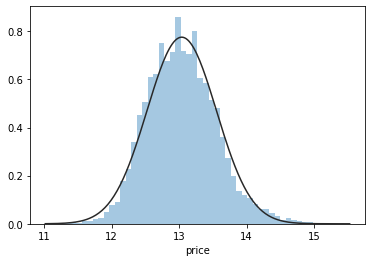

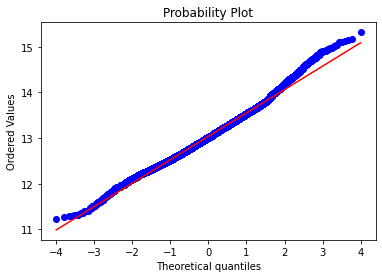

In [ ]:
#transformed histogram and normal probability plot
from scipy.stats import norm
from scipy import stats

sns.distplot(house['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(house['price'], plot=plt)

In [ ]:
house['sqft_living'] = np.log(house['sqft_living'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


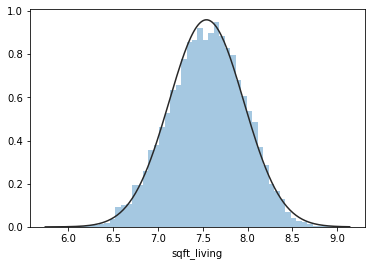

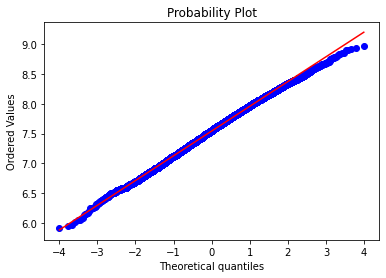

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(house['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(house['sqft_living'], plot=plt)

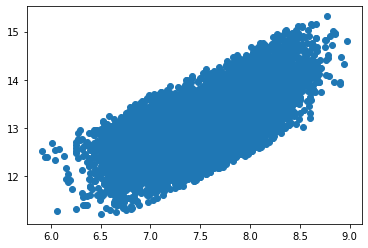

In [ ]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(house['sqft_living'], house['price']);
#Now there is a nice linear relationship between the features

# Multiple Linear Regression

In [ ]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously. 
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
# 

X = house[[ 'grade' , 'bathrooms' , 'sqft_living15' , "sqft_living"]]
y = house['price']

In [ ]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
grade,0.184685
bathrooms,-0.022060
sqft_living15,0.000092
sqft_living,0.364957


In [ ]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
10974,12.899220,13.326688
7786,12.628067,12.757402
5703,12.886641,12.799581
3748,14.711599,13.789743
9038,12.894182,12.733133
...,...,...
12825,13.304602,12.842660
16782,11.918391,12.536028
3691,12.100434,12.697002
160,12.449019,12.859935


In [ ]:
# Evaluating the Algorithm
# ---
# 
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.5324675017930198


53% accuracy

# Residual plot

In [ ]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

# Checking for Heteroskedasticity using Barlette's Test
The concept of heteroscedasticity - the opposite being homoscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

The barlett'stest establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints

In [ ]:
## Performing the barlett's test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is ok. No need to reasses')
  print('The variances are homogeneous')

The test result of 22.76 is less than the critical value of 4713.56
Thefore the variances are equal, which means that the model is ok. No need to reasses
The variances are homogeneous


# Quantile regression

Text(0.5, 1.0, 'Data with constant variance')

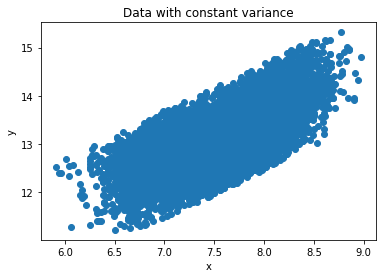

In [ ]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously. 
# However, unlike last time, this time around we are going to use column names for creating an attribute set and label.
# ---
# 

x = house["sqft_living"].values.reshape(-1, 1)
y = house['price']
plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

In [ ]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))


Mean squared error: 0.15
Variance score: 0.44


Text(0.5, 1.0, 'Linear regression')

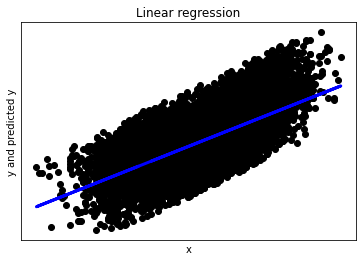

In [ ]:
## Plotting the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ sqft_living', house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2301
Model:                       QuantReg   Bandwidth:                     0.07207
Method:                 Least Squares   Sparsity:                        1.048
Date:                Thu, 15 Apr 2021   No. Observations:                21363
Time:                        19:17:46   Df Residuals:                    21361
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8954      0.065    105.848      0.000       6.768       7.023
sqft_living     0.8163      0.009     94.644      0.000       0.799       0.833


In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['sqft_living']] + res.conf_int().loc['sqft_living'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   6.572994  0.790590        0.776723        0.804457
1  0.2   6.522205  0.816676        0.801828        0.831523
2  0.3   6.461709  0.842064        0.824319        0.859809
3  0.4   6.594733  0.841029        0.822624        0.859435
4  0.5   6.895381  0.816335        0.799428        0.833241
5  0.6   7.201200  0.788664        0.773876        0.803452
6  0.7   7.415438  0.772568        0.756374        0.788763
7  0.8   7.574611  0.766389        0.746556        0.786221
8  0.9   7.377437  0.815569        0.787278        0.843860


In [ ]:
# Making Predictions
# 
pred = res.predict(X)
# To compare the actual output values for X_test with the predicted values
# 
df1 = pd.DataFrame({'Actual': y, 'Predicted': pred})
df1

,Actual,Predicted
0,12.309982,13.146178
1,13.195614,13.781010
2,12.100712,12.798028
3,13.311329,13.560022
4,13.142166,13.434301
...,...,...
21608,12.793859,13.358024
21609,12.899220,13.694022
21610,12.904459,13.027340
21611,12.899220,13.394510


<Figure size 432x288 with 0 Axes>

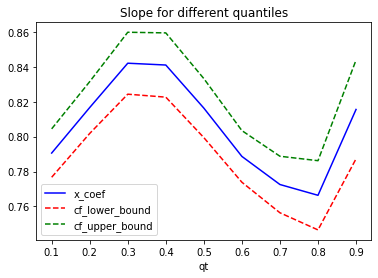

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

# We would be able to see how the slope value varies for different quantiles. 
# Compared with linear regression which is flat across all the quantiles, 
# Quantile Regression allows us to investigate into the different areas of the data 
# and model them appropriately.

# Lasso 

In [ ]:
#Creating target and features
X = house.drop(['price'],axis=1)
y = house['price']
from sklearn.model_selection import train_test_split

#split data into test and train datasets
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
    
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
# Create Scaler Object
scaled_data = StandardScaler()

# Fit and transform Data to Scaler Object
X_train_scaled = scaled_data.fit_transform(X_train)
X_test_scaled = scaled_data.transform(X_test)


#view the scaled data
print('Original Data')
display(house.head())

# Print separator dashes and view data
print('-'*100)
print('Transformed Data')
pd.DataFrame(X_train_scaled, columns=columns).head()

Original Data


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,13.195614,3,2.25,7.851661,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,12.100712,2,1.00,6.646391,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,13.142166,3,2.00,7.426549,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


----------------------------------------------------------------------------------------------------
Transformed Data


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.751052,0.564811,1.377098,0.743524,0.943739,-0.081995,-0.302303,-0.631525,2.047430,1.987023,-0.656579,1.127179,-0.208576,-1.270218,-1.556094,1.344411,2.020642,0.966041
1,-0.405334,-0.124746,-0.425029,-0.242067,0.943739,-0.081995,-0.302303,-0.631525,-0.555230,-0.240268,-0.656579,1.195403,-0.208576,-0.670949,-1.623704,1.144899,0.440686,-0.284120
2,-1.561721,-0.124746,-0.802271,-0.298697,-0.913256,-0.081995,-0.302303,0.906210,0.312323,-0.529690,-0.656579,0.103806,-0.208576,-0.483678,0.534073,0.767250,-0.268080,-0.372070
3,-0.405334,-1.503859,-0.820100,-0.187842,0.015241,-0.081995,-0.302303,-0.631525,-0.555230,-0.542274,-0.656579,-0.612554,-0.208576,0.883405,1.021730,-0.579458,-0.223782,-0.218445
4,0.751052,-0.469524,-0.350321,-0.170389,-0.913256,-0.081995,-0.302303,-0.631525,-0.555230,-0.177350,-0.656579,-0.407880,-0.208576,-0.876948,-1.184956,0.090333,-0.519101,-0.186797


# Creating a Lasso Regression with $\alpha$ = 1

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Lasso

# Lasso is also known as the L1 norm 
# Default alpha value is 1
lasso = Lasso(alpha=1, max_iter=1000, random_state=0, tol=0.01) 
lasso.fit(X_train_scaled, y_train)

# See how many variables were removed
print(f'There are {len(lasso.coef_)} total parameters')
print(f'There have been {sum((abs(lasso.coef_) > 0))} features removed with an alpha value of {lasso.alpha}')
print(f'There are {100 - sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_)*100:.3}% of the original parameters')
print('-'*100)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {lasso.score(X_train_scaled, y_train):.3f}')
print(f'Test r^2: {lasso.score(X_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, lasso.predict(X_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(X_test_scaled)): .3f}')

There are 18 total parameters
There have been 0 features removed with an alpha value of 1
There are 0.0% of the original parameters
----------------------------------------------------------------------------------------------------
Training r^2: 0.000
Test r^2: -0.000
Training MSE:  0.267
Test MSE:  0.258


# Ridge Regression with $\alpha$ = 1

In [ ]:
from sklearn.linear_model import Ridge


# Ridge is also known as the L2 norm
# Alpha default is 1.0
ridge = Ridge(alpha= 1,random_state = 1)
ridge.fit(X_train_scaled, y_train)

print(f'Training r^2: {ridge.score(X_train_scaled, y_train):.3f}')
print(f'Test r^2: {ridge.score(X_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, ridge.predict(X_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(X_test_scaled)): .3f}')

Training r^2: 0.767
Test r^2:  0.758
Training MSE:  0.062
Test MSE:  0.063


# Finding Optimized Lasso Alpha Value

In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

The optimal alpha value is :1e-10


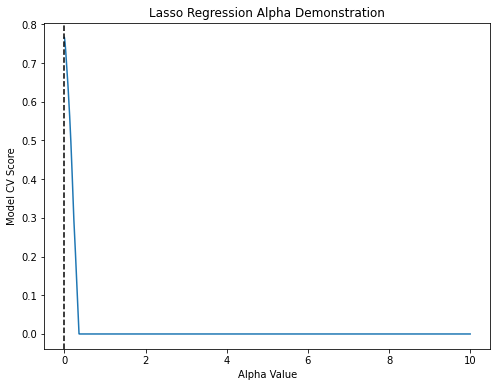

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an array of alpha values to test
# Start np.linspace value is 10**-10 because a value of 0 throws warnings
alphas = np.logspace(-10, 1, 1000,base=10)

# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]

# Specify number of folds for cross_validation
n_folds = 5

# Create grid search instance using desired variables
clf_lasso = GridSearchCV(lasso, tuned_parameters, cv=5, refit=True)
clf_lasso.fit(X_train_scaled, y_train)
lasso_scores = clf_lasso.cv_results_['mean_test_score']

# Plot the results
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, lasso_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Model CV Score')
plt.title('Lasso Regression Alpha Demonstration')
plt.axvline(clf_lasso.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is :{clf_lasso.best_params_["alpha"]}')

Notice how the optimal alpha value is 0.0106 and not 0. This proves that adding this bit of alpha produced a higher cross-validation score than a pure linear regression did. It is easy to see in this chart that as the alpha value increases the CV score approaches and hits 0.

# Creating Optimized Lasso Regression

In [ ]:

# Set alpha = optimized alpha value
lasso_optimized_alpha = clf_lasso.best_params_['alpha']

# Default alpha value is 1
lasso = Lasso(alpha=lasso_optimized_alpha,random_state=1) 
lasso.fit(X_train_scaled, y_train)

# See how many variables were removed
print(f'There are {len(lasso.coef_)} total parameters')
print(f'There have been {sum((abs(lasso.coef_) > 0))} features removed with an alpha value of {lasso.alpha}')
print(f'There are {100 - sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_)*100:.4}% of the original parameters')
print('-'*100)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {lasso.score(X_train_scaled, y_train):.3f}')
print(f'Test r^2: {lasso.score(X_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, lasso.predict(X_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(X_test_scaled)): .3f}')

There are 18 total parameters
There have been 18 features removed with an alpha value of 1e-10
There are 100.0% of the original parameters
----------------------------------------------------------------------------------------------------
Training r^2: 0.767
Test r^2:  0.758
Training MSE:  0.062
Test MSE:  0.063


# Finding Optimized Ridge Alpha Value

The optimal alpha value is: 13.466617259714836


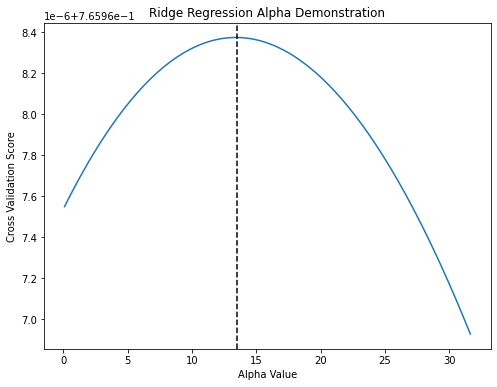

In [ ]:
#from sklearn.model_selection import Ridge
from sklearn.linear_model import RidgeCV

# Create an array of alpha values to test
alphas = np.logspace(-1, 1.5, 500,base=10)

# Create a Ridge model instance
ridge = Ridge(random_state=0, max_iter=10000,alpha=alphas)


# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]

# Specify number of folds for cross_validation
n_folds = 5

# Create grid search instance using desired variables
clf_ridge = GridSearchCV(ridge, tuned_parameters, cv=5, refit=False)
clf_ridge.fit(X_train_scaled, y_train)
ridge_scores = clf_ridge.cv_results_['mean_test_score']

# Plot the Figure
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, ridge_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Cross Validation Score')
plt.title('Ridge Regression Alpha Demonstration')
plt.axvline(clf_ridge.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is: {clf_ridge.best_params_["alpha"]}')

# Creating Optimized Ridge Regression

In [ ]:
# Set alpha = optimized alpha value
ridge_optimized_alpha = clf_ridge.best_params_['alpha']

# Default alpha value is 1
ridge = Ridge(alpha=ridge_optimized_alpha,random_state=1) 
ridge.fit(X_train_scaled, y_train)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {ridge.score(X_train_scaled, y_train):.3f}')
print(f'Test r^2: {ridge.score(X_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, ridge.predict(X_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(X_test_scaled)): .3f}')

Training r^2: 0.767
Test r^2:  0.758
Training MSE:  0.062
Test MSE:  0.063


# Results of Optimized Models vs Simple Regression

In [ ]:
# Ridge Regression
print('Ridge Regression')
print(f'Test r^2: {ridge.score(X_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(X_test_scaled)): .3f}')

print('*'*100)

# Lasso Regression 
print('Lasso Regression')
print(f'Test r^2: {lasso.score(X_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(X_test_scaled)): .3f}')

print('*'*100)

Ridge Regression
Test r^2:  0.758
Test MSE:  0.063
****************************************************************************************************
Lasso Regression
Test r^2:  0.758
Test MSE:  0.063
****************************************************************************************************


# ElasticNet Regression

In [ ]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
X=house[feature_cols]
y=house['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test = train_test_split(X, y, random_state=3)

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 


0.06307239838036502


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.06816290475542189,
 'bedrooms': -0.027616661569905263,
 'condition': 0.060129063743550586,
 'floors': 0.06927073540645283,
 'grade': 0.15513490984613623,
 'lat': 1.3983775259334248,
 'long': -0.1642013310115796,
 'sqft_above': 6.23339837003756e-05,
 'sqft_basement': 6.442208473832123e-05,
 'sqft_living': 0.21953818836820313,
 'sqft_living15': 9.099577774531134e-05,
 'sqft_lot': 4.785170144905224e-07,
 'sqft_lot15': -2.1465005460584785e-07,
 'view': 0.08004213938395853,
 'yr_built': -0.0035485399964262313,
 'yr_renovated': 3.800749647124148e-05,
 'zipcode': -0.0006193173419669095}

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

0.06397182611925134

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.19197268590270206


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 0.020977712000334138,
 'bedrooms': 0.0018743866180914888,
 'condition': 0.0,
 'floors': 0.0,
 'grade': 0.02521957895211007,
 'lat': 0.13543245630531373,
 'long': -0.0,
 'sqft_above': 2.387248585190272e-05,
 'sqft_basement': 7.004399585193477e-06,
 'sqft_living': 0.061510321783762,
 'sqft_living15': 3.264097418087446e-05,
 'sqft_lot': 0.0,
 'sqft_lot15': 0.0,
 'view': 0.0076757286865396495,
 'yr_built': -0.0,
 'yr_renovated': 0.0,
 'zipcode': 0.0}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
# Defining two functions for error measuring: RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [ ]:
# ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())

y_train_ela = elasticNet.predict(X_train)


Best l1_ratio : 1.0
Best alpha : 6.0
Try again for more precision with l1_ratio centered around 1.0
Best l1_ratio : 1
Best alpha : 6.0
Now try again for more precision on alpha, with l1_ratio fixed at 1 and alpha centered around 6.0
Best l1_ratio : 1
Best alpha : 8.399999999999999
ElasticNet RMSE on Training set : 0.515375383076252
ElasticNet RMSE on Test set : 0.36108849918742136


# 9. Follow up questions
>  Did we have the right data?
No.

>  Do we need other data to answer our question?
Yes, more conclusive features should be included.

# Conclusion
> Linear Regression and Lasso Regression yield accurate models and can be used for prediction